<a href="https://colab.research.google.com/github/KonstantinAviutskii/CVAI/blob/main/WildlifeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Google Colab command to see what GPU we've been assigned:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jun  9 08:55:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#Connecting to the GDrive
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/CVAI/Task2'
%ls

Mounted at /content/drive
/content/drive/MyDrive/CVAI/Task2
 augmented/                     preprocessed/     WildlifeDetection
'Copy of ObjectDetection'       runs/             yolo11n.pt
'Copy of ObjectDetection (1)'   Vedai.v1i.coco/  'YOLO ObjectDetection'
 dataset/                       WAID-main/        yolov8n.pt
 ObjectDetection2               wandb/            yolov8x.pt


In [ ]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
pip install squarify

In [ ]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


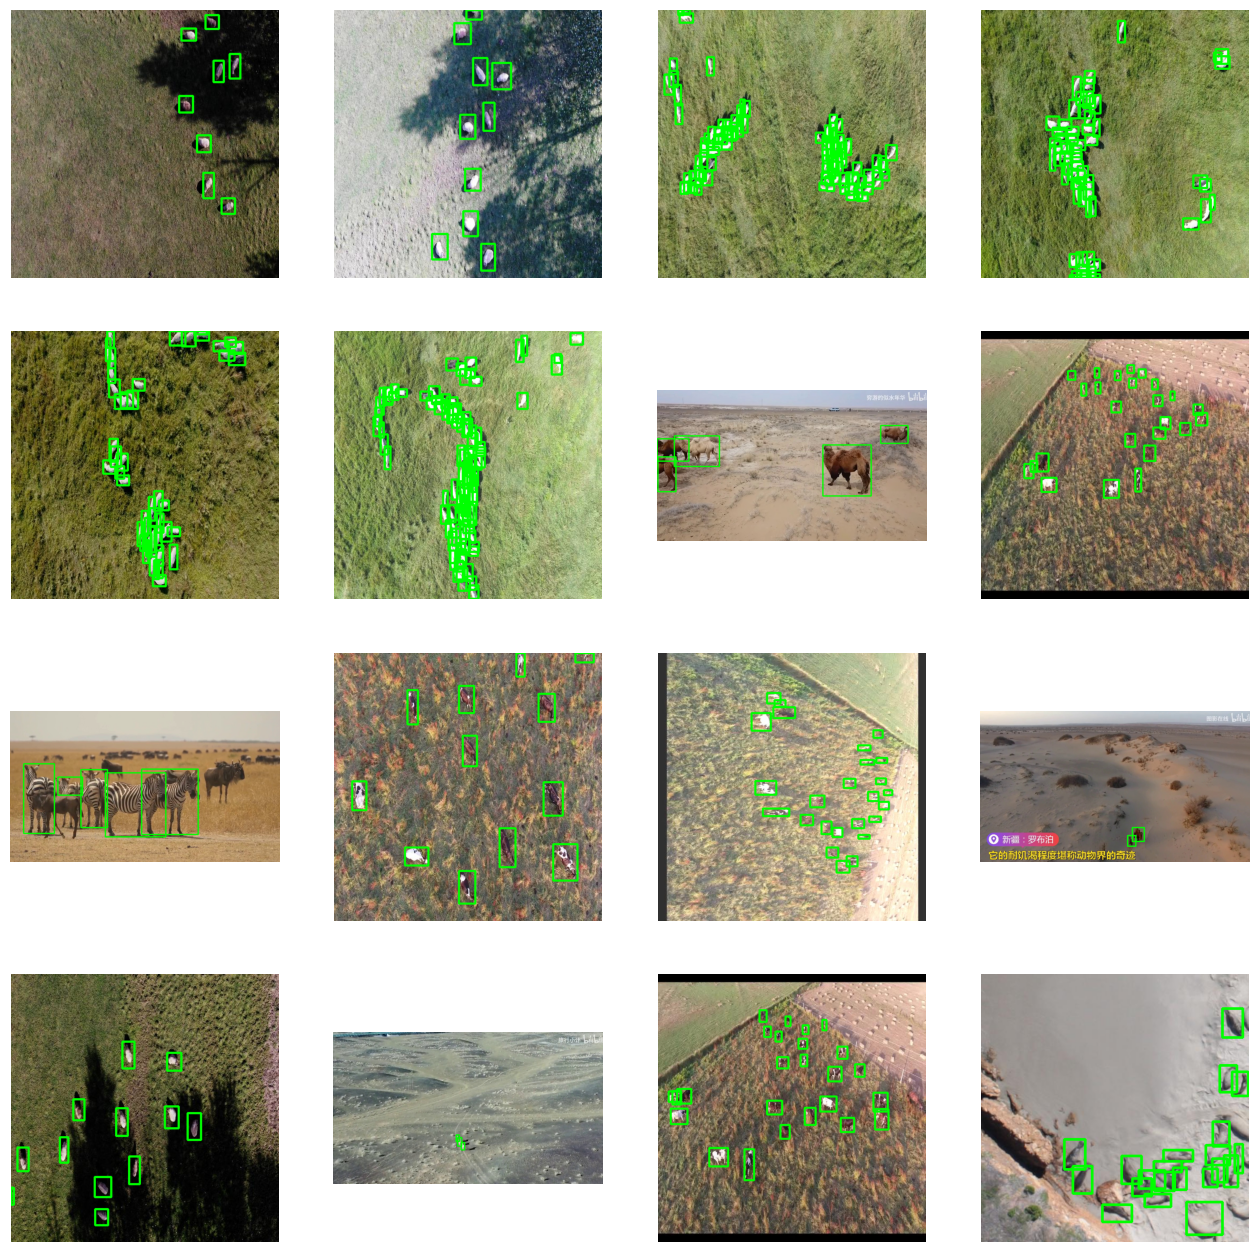

In [ ]:
# Define the paths to the images and labels directories
train_images = "/content/drive/MyDrive/CVAI/Task2/WAID-main/train/images"
train_labels = "/content/drive/MyDrive/CVAI/Task2/WAID-main/train/labels"

test_images = "/content/drive/MyDrive/CVAI/Task2/WAID-main/test/images"
test_labels = "/content/drive/MyDrive/CVAI/Task2/WAID-main/test/labels"

val_images = "/content/drive/MyDrive/CVAI/Task2/WAID-main/valid/images"
val_labels = "/content/drive/MyDrive/CVAI/Task2/WAID-main/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [ ]:
# Load an image using OpenCV
image = cv2.imread("/content/drive/MyDrive/CVAI/Task2/WAID-main/test/images/1b871acb-efdd-4957-8ae8-c7dbae071bde_jpg.rf.04c9b09fd0ec4f49941893288017bea1.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


In [ ]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/content/drive/MyDrive/CVAI/Task2/WAID-main/data.yaml',
            epochs = 10,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CVAI/Task2/WAID-main/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

100%|██████████| 755k/755k [00:00<00:00, 83.5MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           


  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1948800  ultralytics.nn.modules.block.C2f             [960,

train: Scanning /content/drive/MyDrive/CVAI/Task2/WAID-main/train/labels... 10056 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10056/10056 [4:21:39<00:00,  1.56s/it]


train: New cache created: /content/drive/MyDrive/CVAI/Task2/WAID-main/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 4.4±8.3 ms, read: 0.1±0.1 MB/s, size: 87.3 KB)


val: Scanning /content/drive/MyDrive/CVAI/Task2/WAID-main/valid/labels... 2873 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2873/2873 [42:02<00:00,  1.14it/s]


val: New cache created: /content/drive/MyDrive/CVAI/Task2/WAID-main/valid/labels.cache
Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.72G      1.541      1.003      1.254         41        640: 100%|██████████| 1257/1257 [13:50<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:29<00:00,  2.02it/s]


                   all       2873      46703      0.703      0.646      0.688      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       7.1G      1.509     0.7973      1.235        169        640: 100%|██████████| 1257/1257 [13:26<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:27<00:00,  2.06it/s]


                   all       2873      46703      0.834      0.735      0.801      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.13G      1.459     0.7367      1.214         83        640: 100%|██████████| 1257/1257 [13:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:27<00:00,  2.05it/s]


                   all       2873      46703      0.822      0.746      0.819      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.13G      1.421     0.6735      1.188        149        640: 100%|██████████| 1257/1257 [13:34<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:28<00:00,  2.04it/s]


                   all       2873      46703      0.865      0.795      0.853      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.11G      1.376     0.6291      1.161        101        640: 100%|██████████| 1257/1257 [13:33<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:28<00:00,  2.04it/s]

                   all       2873      46703      0.886      0.813      0.876      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.95G      1.334     0.5842      1.143        144        640: 100%|██████████| 1257/1257 [13:32<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:27<00:00,  2.06it/s]

                   all       2873      46703      0.907      0.841      0.906      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.09G      1.309     0.5631      1.132        135        640: 100%|██████████| 1257/1257 [13:33<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:27<00:00,  2.05it/s]

                   all       2873      46703      0.918      0.846      0.905      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.08G      1.278     0.5336      1.115        154        640: 100%|██████████| 1257/1257 [13:33<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:27<00:00,  2.05it/s]

                   all       2873      46703      0.924      0.887      0.936      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.08G      1.253      0.512      1.104         97        640: 100%|██████████| 1257/1257 [13:34<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:27<00:00,  2.06it/s]

                   all       2873      46703      0.931      0.894      0.939      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.11G      1.224     0.4891      1.091         74        640: 100%|██████████| 1257/1257 [13:34<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:26<00:00,  2.07it/s]

                   all       2873      46703      0.944      0.902      0.953      0.606



10 epochs completed in 2.521 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 136.7MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,129,346 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 180/180 [01:32<00:00,  1.94it/s]


                   all       2873      46703      0.944      0.901      0.953      0.606
                 sheep        830      26063      0.968      0.964       0.98      0.645
                cattle        932      12605      0.973      0.933      0.974      0.667
                  seal        701       4926      0.954      0.967      0.984      0.705
               camelus        154       1271      0.938      0.855      0.937      0.537
                 kiang        134        837      0.914      0.815      0.909      0.487
                 zebra        122       1001      0.916      0.873      0.932      0.593
Speed: 0.2ms preprocess, 25.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796cc8c644d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

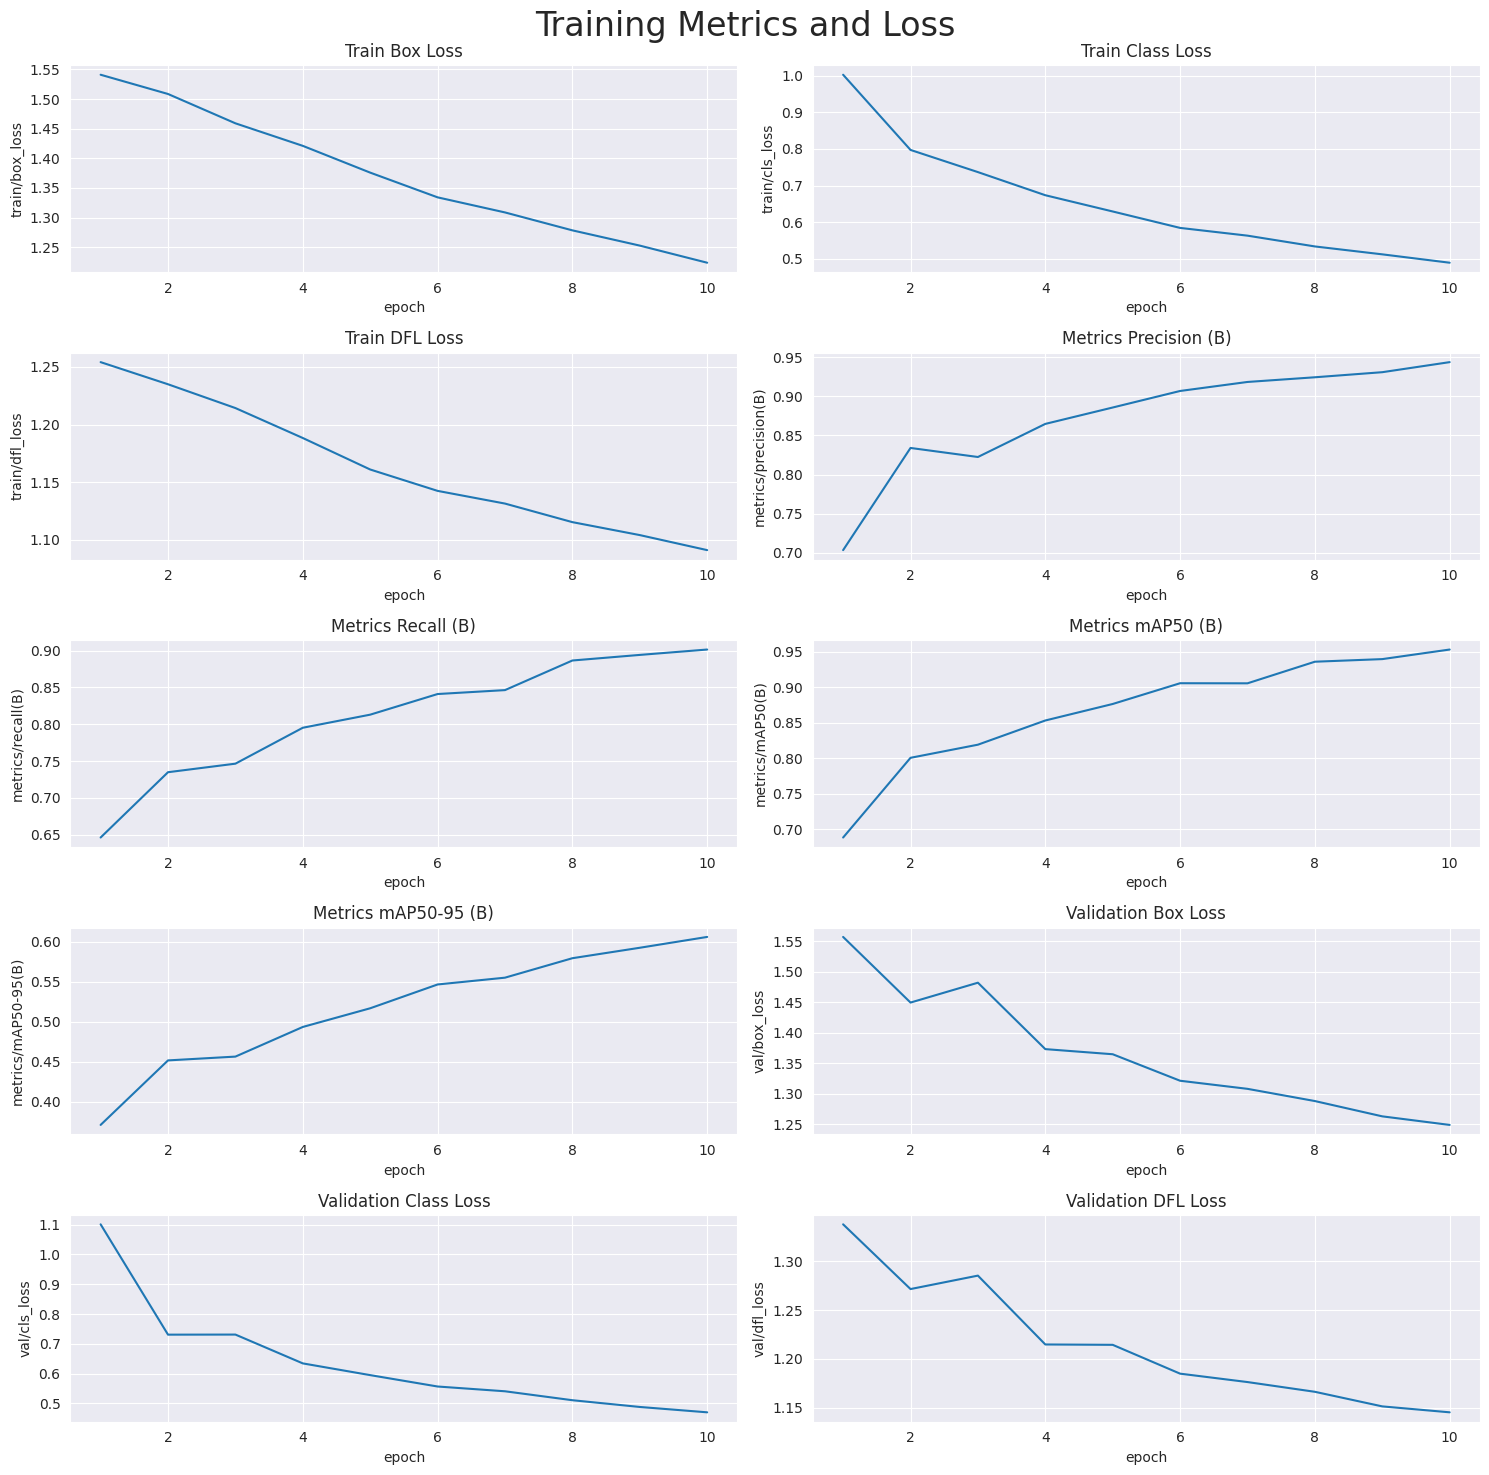

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/CVAI/Task2/runs/detect/train10/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/drive/MyDrive/CVAI/Task2/runs/detect/train10/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,129,346 parameters, 0 gradients, 257.4 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 0.1±0.0 MB/s, size: 77.9 KB)


val: Scanning /content/drive/MyDrive/CVAI/Task2/WAID-main/test/labels... 1437 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1437/1437 [21:17<00:00,  1.12it/s]


val: New cache created: /content/drive/MyDrive/CVAI/Task2/WAID-main/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [01:37<00:00,  1.09s/it]


                   all       1437      23820       0.93      0.901      0.941       0.63
                 sheep        424      13323      0.963      0.963      0.978      0.667
                cattle        466       6240      0.968      0.931      0.968      0.703
                  seal        323       2689      0.955      0.958      0.974      0.725
               camelus         82        676      0.897      0.859      0.921      0.573
                 kiang         81        460      0.896      0.821      0.881      0.503
                 zebra         61        432      0.901      0.873      0.923      0.612
Speed: 0.3ms preprocess, 63.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val2


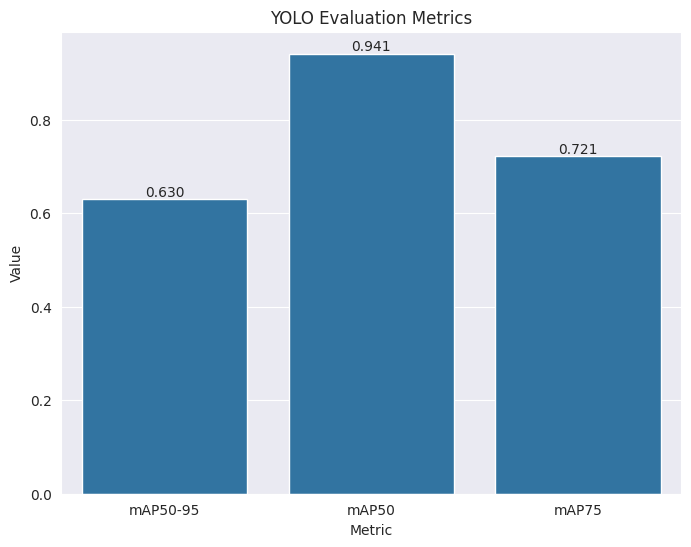

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

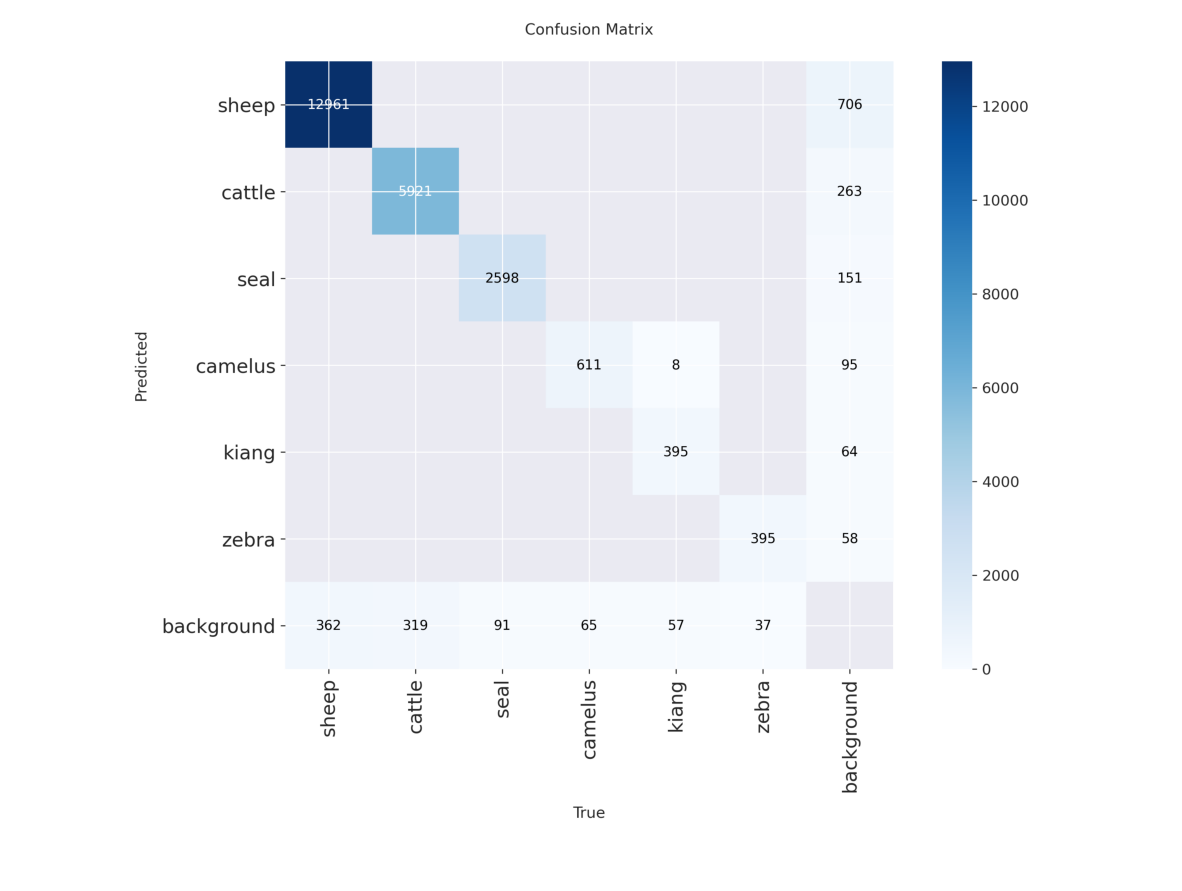

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/drive/MyDrive/CVAI/Task2/runs/detect/val2/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [ ]:
# Function to perform object detections
def object_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    # Access the first element of the results list and call plot()
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 35 sheeps, 94.5ms
Speed: 7.4ms preprocess, 94.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 seals, 85.8ms
Speed: 4.7ms preprocess, 85.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 sheeps, 56.6ms
Speed: 4.2ms preprocess, 56.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 kiangs, 44.0ms
Speed: 3.2ms preprocess, 44.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 zebras, 33.4ms
Speed: 3.2ms preprocess, 33.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 640x640 36 sheeps, 55.3ms
Speed: 4.0ms preprocess, 55.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 seals, 56.0ms
Speed: 3.5ms preprocess, 56.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 kiangs, 35.8ms
Speed: 3.1ms preprocess, 35.8ms inference, 1.5ms postprocess per image at shape (1, 3, 3

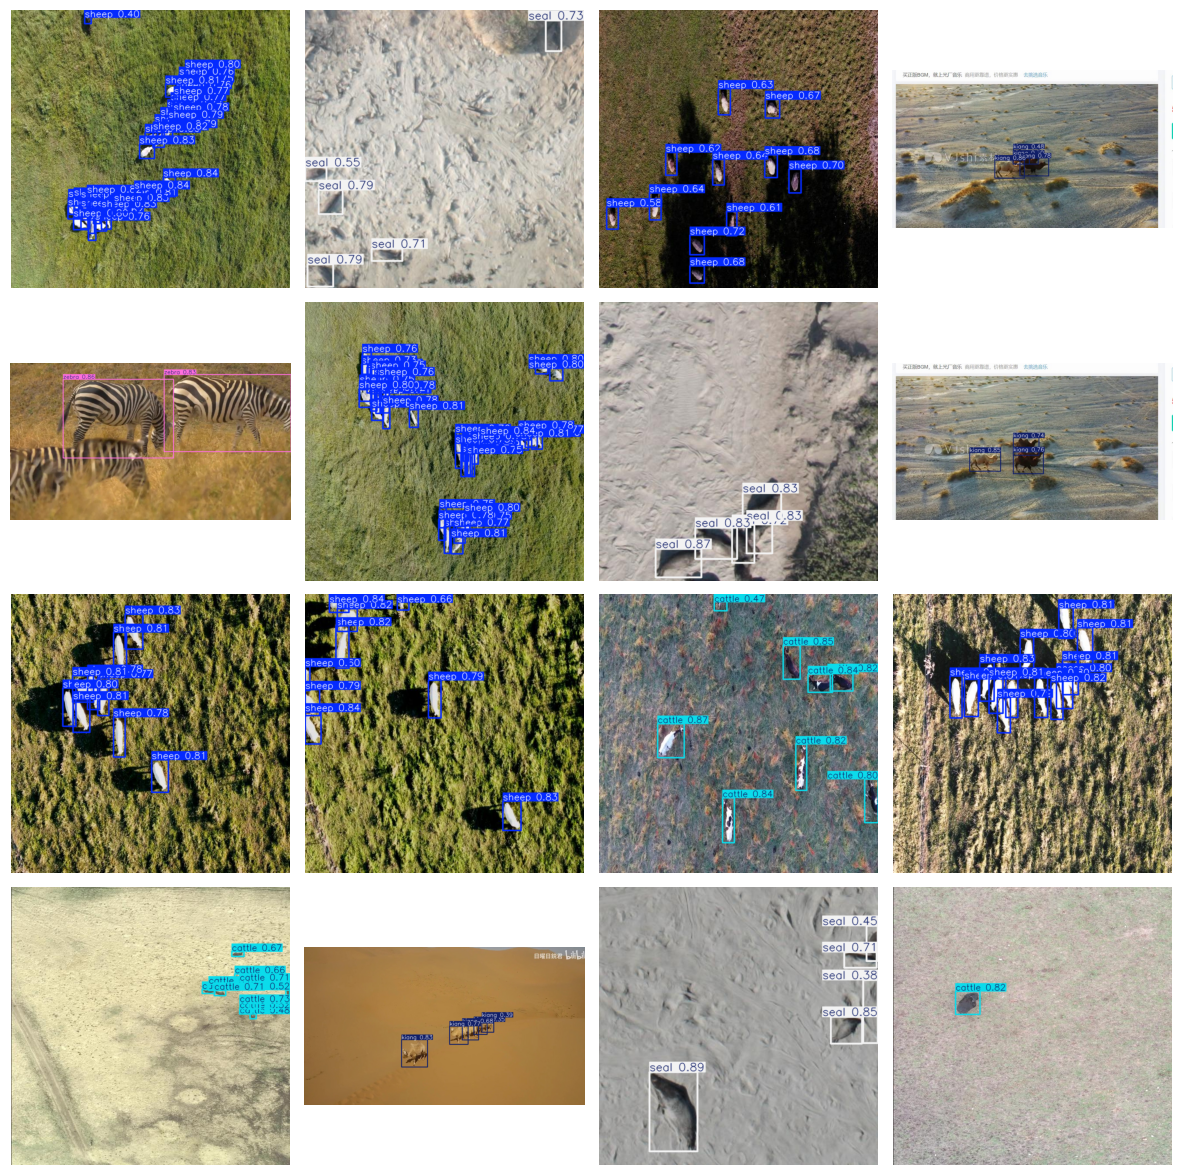

In [ ]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/content/drive/MyDrive/CVAI/Task2/WAID-main/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = object_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)